In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Getting raw dataset from Drive

In [ ]:
!unzip '/content/drive/MyDrive/NSU/Fake_med/archive (2).zip' #unzip the zip file

unzip:  cannot find or open /content/drive/MyDrive/NSU/Fake_med/archive (2).zip, /content/drive/MyDrive/NSU/Fake_med/archive (2).zip.zip or /content/drive/MyDrive/NSU/Fake_med/archive (2).zip.ZIP.


### Amount of data per class

In [ ]:
import os

## Copy class folders to a single directory

In [ ]:
import os
os.makedirs('/content/drive/MyDrive/NSU/Fake_med/Dataset1')
!cp -r '/content/fake-real lung/Fake' -d '/content/drive/MyDrive/NSU/Fake_med/Dataset1'
!cp -r '/content/fake-real lung/Real' -d '/content/drive/MyDrive/NSU/Fake_med/Dataset1'


## Split the dataset into the ratio of train: validation: test = 70: 20: 10

In [ ]:
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import splitfolders
splitfolders.ratio('/content/drive/MyDrive/NSU/Fake_med/Dataset1', output="splitted_data", seed=1337, ratio=(.7, 0.2,0.1)) 

Copying files: 4200 files [01:53, 36.92 files/s] 


### Saving splitted dataset to Drive

In [ ]:
!zip -r '/content/splitted_data.zip' '/content/splitted_data'

!cp '/content/splitted_data.zip' -d '/content/drive/MyDrive/NSU/Fake_med'

  adding: content/splitted_data/ (stored 0%)
  adding: content/splitted_data/train/ (stored 0%)
  adding: content/splitted_data/train/Fake/ (stored 0%)
  adding: content/splitted_data/train/Fake/Normal-1840.png (deflated 0%)
  adding: content/splitted_data/train/Fake/Normal-1219.png (deflated 0%)
  adding: content/splitted_data/train/Fake/Normal-817.png (deflated 0%)
  adding: content/splitted_data/train/Fake/Normal-387.png (deflated 0%)
  adding: content/splitted_data/train/Fake/Normal-1602.png (deflated 0%)
  adding: content/splitted_data/train/Fake/Normal-2612.png (deflated 0%)
  adding: content/splitted_data/train/Fake/Normal-1826.png (deflated 0%)
  adding: content/splitted_data/train/Fake/Normal-3365.png (deflated 0%)
  adding: content/splitted_data/train/Fake/Normal-2059.png (deflated 0%)
  adding: content/splitted_data/train/Fake/Normal-2432.png (deflated 0%)
  adding: content/splitted_data/train/Fake/Normal-2118.png (deflated 0%)
  adding: content/splitted_data/train/Fake/Norm

## Getting splitted data from drive

In [ ]:
!cp '/content/drive/MyDrive/NSU/Fake_med/splitted_data.zip' -d '/content'
!unzip '/content/splitted_data.zip'

Archive:  /content/splitted_data.zip
   creating: content/splitted_data/
   creating: content/splitted_data/train/
   creating: content/splitted_data/train/Fake/
  inflating: content/splitted_data/train/Fake/Normal-1840.png  
  inflating: content/splitted_data/train/Fake/Normal-1219.png  
  inflating: content/splitted_data/train/Fake/Normal-817.png  
  inflating: content/splitted_data/train/Fake/Normal-387.png  
  inflating: content/splitted_data/train/Fake/Normal-1602.png  
  inflating: content/splitted_data/train/Fake/Normal-2612.png  
  inflating: content/splitted_data/train/Fake/Normal-1826.png  
  inflating: content/splitted_data/train/Fake/Normal-3365.png  
  inflating: content/splitted_data/train/Fake/Normal-2059.png  
  inflating: content/splitted_data/train/Fake/Normal-2432.png  
  inflating: content/splitted_data/train/Fake/Normal-2118.png  
  inflating: content/splitted_data/train/Fake/Normal-1545.png  
  inflating: content/splitted_data/train/Fake/Normal-2834.png  
  inflat

## Training

In [ ]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# import all libraries
# Train/Test Libraries

import os
import numpy as np
import tensorflow as tf
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import scikitplot
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report

### Data Generators

data generators for image data augmentation and creates generators for training, validation, and test datasets. Let's go through the code step by step:

data_aug_train is an instance of ImageDataGenerator from TensorFlow's Keras API. It is used to perform data augmentation on the training images. The specified augmentation techniques include height shifting, width shifting, rotation, shearing, filling mode, and zooming.

train_generator is created by calling the flow_from_directory method of data_aug_train. It generates batches of augmented training data by loading images from the specified directory (/content/content/splitted_data/train). The images are resized to a target size of 224x224 pixels, converted to RGB color mode, and the class labels are encoded as categorical. The batch size is set to 32, and the images are shuffled during training.

data_aug_val and val_generator are similar to data_aug_train and train_generator, respectively, but they are used for the validation dataset. The images are loaded from the directory /content/content/splitted_data/val.

data_aug_test and test_generator are used for the test dataset. The images are loaded from the directory /content/content/splitted_data/test. The batch size is set to 421, which corresponds to the total number of images in the test dataset. The images are not shuffled during testing.

These data generators enable efficient loading and augmentation of image data during model training and evaluation. They can be used with TensorFlow models for training, validation, and testing.

In [ ]:
data_aug_train = tf.keras.preprocessing.image.ImageDataGenerator(
    height_shift_range = 0.15,
    width_shift_range = 0.15,
    rotation_range = 10,
    shear_range = 0.1,
    fill_mode = 'nearest',
    zoom_range = 0.2)

train_generator = data_aug_train.flow_from_directory(
        '/content/content/splitted_data/train',
        target_size=(224, 224),
        batch_size = 32,
        class_mode ='categorical',
        color_mode = 'rgb',
        classes = ['Fake', 'Real'],
        seed = 2,
        shuffle = True,
        interpolation = 'lanczos'
        )

data_aug_val = tf.keras.preprocessing.image.ImageDataGenerator()

val_generator = data_aug_val.flow_from_directory(
        '/content/content/splitted_data/val',
        target_size =(224, 224),
        batch_size =32,
        class_mode ='categorical',
        color_mode = 'rgb',
        classes= ['Fake', 'Real'],
        seed = 2,
        shuffle = True,
        interpolation = 'lanczos'
        )

data_aug_test = tf.keras.preprocessing.image.ImageDataGenerator()

test_generator = data_aug_test.flow_from_directory(
        '/content/content/splitted_data/test',
        target_size = (224, 224),
        batch_size = 421,
        class_mode ='categorical',
        color_mode = 'rgb',
        classes = ['Fake', 'Real'],
        shuffle = False,
        interpolation = 'lanczos'
        )

Found 2939 images belonging to 2 classes.
Found 840 images belonging to 2 classes.
Found 421 images belonging to 2 classes.


#### Class Indices

The class_indices attribute of the data generators gives a dictionary that maps the class labels to their corresponding indices. In your case, since you have two classes ('Fake' and 'Real'), the class_indices dictionary will provide the mapping of these classes to their indices.



In [ ]:
train_generator.class_indices, val_generator.class_indices

({'Fake': 0, 'Real': 1}, {'Fake': 0, 'Real': 1})

### Building and Compiling Model (Transfer Learning)

MobileNetV2_Model() that builds a classification model using the MobileNetV2 architecture pre-trained on ImageNet. Here's a breakdown of the code:

The function begins by loading the MobileNetV2 model from the tf.keras.applications module. The weights parameter is set to "imagenet" to use the pre-trained weights. The include_top parameter is set to False to exclude the fully connected layer at the top of the network. The input_shape parameter specifies the input image shape as (224, 224, 3).

The output of the base MobileNetV2 model is obtained and passed through additional layers for classification. The output is first globally averaged using GlobalAveragePooling2D() to reduce spatial dimensions. Then, two fully connected layers with ReLU activation and dropout regularization are added.

The final output layer consists of a dense layer with softmax activation, having 2 units corresponding to the two classes ('Fake' and 'Real').

The model is instantiated using tf.keras.Model with the base MobileNetV2 model's input as the input and the constructed output layers as the output.

The pre-trained MobileNetV2 layers are set to be non-trainable (layer.trainable = False) to keep their weights frozen during training.

The model is compiled using the specified loss function (categorical_crossentropy), optimizer (Adam with a specified learning rate and decay), and evaluation metrics (categorical accuracy and AUC).

The summary() method is called on the model to display a summary of its architecture, including the number of parameters and the shape of each layer.

The code sets up a classification model based on the MobileNetV2 architecture, freezes the pre-trained layers, compiles the model, and displays a summary.

In [ ]:
# Using pretrained MobileNetV2 model

def MobileNetV2_Model():
  
  baseModel = tf.keras.applications.MobileNetV2(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

  output = baseModel.output
  output = tf.keras.layers.GlobalAveragePooling2D()(output)
  output = tf.keras.layers.Dense(1024, activation="relu")(output)
  output = tf.keras.layers.Dropout(0.15)(output)
  output = tf.keras.layers.Dense(512, activation="relu")(output)
  output = tf.keras.layers.Dropout(0.15)(output)
  output = tf.keras.layers.Dense(2, activation="softmax")(output)
  model = tf.keras.Model(inputs=baseModel.input, outputs=output)
  for layer in baseModel.layers:
    layer.trainable = False
  return model

model = MobileNetV2_Model()

print("[INFO] compiling model...")
INIT_LR = 0.001
EPOCHS = 200
BATCHSIZE = 64 
optimizer = tf.keras.optimizers.legacy.Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=[tf.keras.metrics.CategoricalAccuracy(), tf.keras.metrics.AUC()])

print(model.summary())

[INFO] compiling model...
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                 

/usr/local/lib/python3.9/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


 block_6_depthwise (DepthwiseCo  (None, 14, 14, 192)  1728       ['block_6_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_6_depthwise_BN (BatchNor  (None, 14, 14, 192)  768        ['block_6_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_6_depthwise_relu (ReLU)  (None, 14, 14, 192)  0           ['block_6_depthwise_BN[0][0]']   
                                                                                                  
 block_6_project (Conv2D)       (None, 14, 14, 64)   12288       ['block_6_depthwise_relu[0][0]'] 
                                                                                                  
 block_6_p

### Fitting dataset to the Model

the trained MobileNetV2 model, defines some callbacks for training, and trains the model using the specified generators. Here's an explanation of the code:

The modelPath variable contains the path to the directory where the model will be saved. If the directory doesn't exist, it is created using os.makedirs(). If the directory already exists, a message is printed indicating its existence.

Two callbacks are defined:

ReduceLROnPlateau: This callback reduces the learning rate when the monitored metric (val_categorical_accuracy) stops improving. The learning rate is reduced by a factor of 0.8 after a specified number of epochs (patience). It also includes additional settings like cooldown, min_lr, and mode.
EarlyStopping: This callback stops training when the monitored metric (val_categorical_accuracy) stops improving. The patience parameter defines the number of epochs to wait before stopping.
Another callback, ModelCheckpoint, is defined to save the best model during training based on the val_categorical_accuracy metric. The best model is saved as MobileNetV2-best-model.h5 in the modelPath directory.

The fit() method is called on the model to train it. The train_generator and val_generator are used as the training and validation data, respectively. The steps_per_epoch is set to the length of the training generator. The specified number of epochs is trained, and the progress is displayed (verbose=1). The defined callbacks (model_checkpoint, reduceLROnPlat, early) are passed to the callbacks parameter.

The trained model is saved using tf.keras.models.save_model() in the modelPath directory with the filename MobileNetV2-model.h5.

The code sets up a directory for saving the model, defines callbacks for training, and trains the MobileNetV2 model using the provided generators.

In [ ]:
modelPath = '/content/drive/MyDrive/NSU/Fake_med/saved_models_new/Pretrained MobileNetV2'
if not os.path.exists(modelPath):
  os.makedirs(modelPath)
  print('Model Directory Created')
else:
  print('Model Directory Already Exists')

reduceLROnPlat = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_categorical_accuracy', factor=0.8, patience=10, verbose=1, mode='max',
                                                      min_delta=0.0001, cooldown=5, min_lr=0.0001)
early = tf.keras.callbacks.EarlyStopping(monitor="val_categorical_accuracy", mode="max", patience=8)

model_checkpoint = tf.keras.callbacks.ModelCheckpoint(modelPath+'/MobileNetV2-best-model.h5', monitor='val_categorical_accuracy',
                                                      verbose=1, save_best_only=True, mode='max')

STEP_TRAIN = len(train_generator) 

modelHistory = model.fit(train_generator, steps_per_epoch=STEP_TRAIN, 
                         validation_data= val_generator, epochs=EPOCHS, verbose=1, callbacks=[model_checkpoint, reduceLROnPlat, early])

tf.keras.models.save_model(model, modelPath+'/MobileNetV2-model.h5', overwrite=True, include_optimizer=True, save_format=None,
                           signatures=None, options=None)

Model Directory Created
Epoch 1/200
92/92 [==============================] - ETA: 0s - loss: 0.2926 - categorical_accuracy: 0.8993 - auc: 0.9542
Epoch 1: val_categorical_accuracy improved from -inf to 0.94048, saving model to /content/drive/MyDrive/NSU/Fake_med/saved_models_new/Pretrained MobileNetV2/MobileNetV2-best-model.h5
92/92 [==============================] - 92s 885ms/step - loss: 0.2926 - categorical_accuracy: 0.8993 - auc: 0.9542 - val_loss: 0.1479 - val_categorical_accuracy: 0.9405 - val_auc: 0.9864 - lr: 0.0010
Epoch 2/200
92/92 [==============================] - ETA: 0s - loss: 0.1528 - categorical_accuracy: 0.9452 - auc: 0.9850
Epoch 2: val_categorical_accuracy improved from 0.94048 to 0.95952, saving model to /content/drive/MyDrive/NSU/Fake_med/saved_models_new/Pretrained MobileNetV2/MobileNetV2-best-model.h5
92/92 [==============================] - 92s 1s/step - loss: 0.1528 - categorical_accuracy: 0.9452 - auc: 0.9850 - val_loss: 0.1128 - val_categorical_accuracy: 0.95

### Saving training history

the training history of the MobileNetV2 model using the pickle module. Here's an explanation of the code:

The pickle module is imported.

The with open() statement opens a file in binary mode with the path /content/drive/MyDrive/NSU/Fake_med/saved_models_new/Pretrained MobileNetV2/MobileNetV2_trainHistoryDict. The file is opened in write mode ('wb').

The pickle.dump() function is called to serialize and save the modelHistory.history dictionary to the opened file. This dictionary contains the training history of the model, including the values of various metrics (e.g., loss, accuracy) during each epoch of training.

After the data is successfully dumped to the file, the file is closed automatically when exiting the with block.

The code saves the training history of the MobileNetV2 model to a file using pickle. This allows you to later load the saved history and analyze or visualize the training progress.

In [ ]:
import pickle
with open('/content/drive/MyDrive/NSU/Fake_med/saved_models_new/Pretrained MobileNetV2/MobileNetV2_trainHistoryDict', 'wb') as file_pi:
  pickle.dump(modelHistory.history, file_pi)

### Plot history (Accuracy, Loss, Auc)

defines a function plot_history that can be used to visualize the training history of a model. Here's an explanation of the code:

The matplotlib.pyplot module is imported and the ggplot style is applied using plt.style.use('ggplot').

The plot_history function is defined, which takes the history dictionary as input.

The function extracts the values of different metrics from the history dictionary, including accuracy, loss, and AUC, for both training and validation sets.

A figure with three subplots is created using plt.figure(figsize=(18, 5)).

In the first subplot (plt.subplot(1, 3, 1)), the training accuracy (acc) and validation accuracy (val_acc) are plotted against the number of epochs (x).

In the second subplot (plt.subplot(1, 3, 2)), the training loss (loss) and validation loss (val_loss) are plotted against the number of epochs.

In the third subplot (plt.subplot(1, 3, 3)), the training AUC (auc) and validation AUC (val_auc) are plotted against the number of epochs.

Titles, labels, and legends are added to each subplot.

The figure is saved as curve.jpg using plt.savefig('curve.jpg',dpi=600).

The commented line # plot_history(modelHistory.history) indicates that the function is not being called in the code snippet. To visualize the training history, you can uncomment this line and pass your modelHistory.history dictionary as an argument to the function.

Note: Make sure you have the necessary dependencies installed (e.g., matplotlib) to run the code successfully.

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history['categorical_accuracy']
    val_acc = history['val_categorical_accuracy']
    loss = history['loss']
    val_loss = history['val_loss']
    auc = history['auc']
    val_auc = history['val_auc']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(18, 5))
    plt.subplot(1, 3, 1)
    plt.plot(x, acc, 'b', label='Training acc',marker = 'p',color='green')
    plt.plot(x,val_acc, 'r', label='Validation acc',marker = 'p',color='red')
    plt.title('Training and Validation accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right' )
    plt.subplot(1, 3, 2)
    plt.plot(x, loss, label='Training loss',marker = 'p',color='green')
    plt.plot(x, val_loss, label='Validation loss',marker = 'p',color='red')
    plt.title('Training and Validation loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    # plt.savefig('curve.jpg',dpi=600)
    plt.subplot(1, 3, 3)
    plt.plot(x, auc, 'b', label='Training loss',marker = 'p',color='green')
    plt.plot(x, val_auc, 'r', label='Validation loss',marker = 'p',color='red')
    plt.title('Training and Validation AUC')
    plt.xlabel('Epoch')
    plt.ylabel('AUC')
    plt.legend()
    plt.savefig('curve.jpg',dpi=600)

# plot_history(modelHistory.history)

oads the training history dictionary from a saved pickle file and then calls the plot_history function to visualize the training history. Here's an explanation of the code:

The pickle module is imported.

The with statement is used to open the pickle file in binary mode for reading.

The pickle.load() function is called to load the contents of the pickle file into the dct variable.

The plot_history function is called with dct as the argument to visualize the training history.

By executing this code, the training history stored in the pickle file will be visualized using the plot_history function.

Note: Make sure the pickle file path is correct and the file exists in the specified location.

<ipython-input-17-e2ef52705e42>:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(x, acc, 'b', label='Training acc',marker = 'p',color='green')
<ipython-input-17-e2ef52705e42>:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x,val_acc, 'r', label='Validation acc',marker = 'p',color='red')
<ipython-input-17-e2ef52705e42>:30: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(x, auc, 'b', label='Training loss',marker = 'p',color='green')
<ipython-input-17-e2ef52705e42>:31: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.

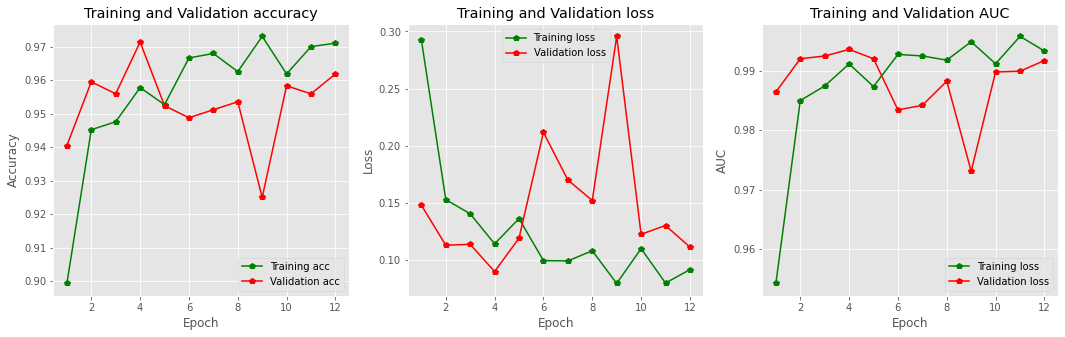

In [ ]:
import pickle
with open('/content/drive/MyDrive/NSU/Fake_med/saved_models_new/Pretrained MobileNetV2/MobileNetV2_trainHistoryDict', 'rb') as file_pi:
  dct=pickle.load(file_pi)

plot_history(dct)

### Saving model weights and history to Drive

The !cp command is a shell command in Jupyter Notebook that is used to copy files or directories. In this case, it is being used to copy the directory saved_models to the destination directory /content/drive/MyDrive/NSU/Fake_med.

Here's an explanation of the command:

!cp: The ! at the beginning of the command indicates that it is a shell command.
-r: The -r flag is used to copy directories recursively.
'/content/saved_models': This is the source directory that is being copied.
-d: The -d flag specifies the destination directory.
'/content/drive/MyDrive/NSU/Fake_med': This is the destination directory where the source directory will be copied to.
By running this command, the directory saved_models will be copied to the destination directory specified.

In [ ]:
!cp -r '/content/saved_models' -d '/content/drive/MyDrive/NSU/Fake_med'

cp: cannot stat '/content/saved_models': No such file or directory


## Evaluate model on test data

The !cp command is a shell command in Jupyter Notebook used to copy files or directories. In this case, it is being used to copy the directory saved_models_new from the source directory /content/drive/MyDrive/NSU/Fake_med to the destination directory /content.

Here's an explanation of the command:

!cp: The ! at the beginning of the command indicates that it is a shell command.
-r: The -r flag is used to copy directories recursively.
"/content/drive/MyDrive/NSU/Fake_med/saved_models_new": This is the source directory that is being copied.
-d: The -d flag specifies the destination directory.
'/content': This is the destination directory where the source directory will be copied to.
By running this command, the directory saved_models_new will be copied from the source directory to the destination directory.



In [ ]:
!cp -r "/content/drive/MyDrive/NSU/Fake_med/saved_models_new" -d '/content'   

### Accuracy, Loss and AUC Score

/content/drive/MyDrive/NSU/Fake_med/saved_models_new/Pretrained MobileNetV2/MobileNetV2-best-model.h5 using tf.keras.models.load_model(). Then, it evaluates the loaded model on the test data using the evaluate() method. Finally, it prints the model's accuracy, loss, and AUC (Area Under the Curve) values.

In [ ]:
# Evaluate the Best Saved Model
model = tf.keras.models.load_model('/content/drive/MyDrive/NSU/Fake_med/saved_models_new/Pretrained MobileNetV2/MobileNetV2-best-model.h5')
loss, accuracy, auc= model.evaluate(test_generator,  verbose=1)
print('Model Accuracy: {:0.2f} | Model Loss: {:0.4f} | Model AUC: {:.02f}'.format(accuracy, loss, auc))

1/1 [==============================] - 10s 10s/step - loss: 0.0920 - categorical_accuracy: 0.9715 - auc: 0.9940
Model Accuracy: 0.97 | Model Loss: 0.0920 | Model AUC: 0.99


### Classification Report and Confusion Matrix

the test_generator to obtain the true labels for the test data. It extracts the labels from label[0] and converts them into a 1D array using np.where() function.



In [ ]:
batch=0
label = []
for x,y in test_generator:
  # cc.append(y)
  if batch==1:
    break
  label.append(y)
  batch+=1
y_true = np.array([np.where(label[0][i] == 1)[0][0] for i in range(len(test_generator.filenames))])
y_true.shape

(421,)

the trained model to make predictions on the test data using the predict_generator method. It predicts the probabilities for each class using model.predict_generator and then selects the class with the highest probability using np.argmax along the appropriate axis.

Y_pred = model.predict_generator(test_generator, 1)
y_pred = np.argmax(Y_pred, axis=1)
The variable Y_pred contains the predicted probabilities for each class for the test data, and y_pred contains the predicted class labels (the class with the highest probability) for each sample.

In [ ]:
Y_pred = model.predict_generator(test_generator, 1)
y_pred = np.argmax(Y_pred, axis=1)

<ipython-input-23-57ce4b19589d>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(test_generator, 1)


In [ ]:
classes= ['Fake', 'Real']
print('Classification Report')
print(classification_report(y_true, y_pred, target_names=classes))

Classification Report
              precision    recall  f1-score   support

        Fake       0.97      0.99      0.98       350
        Real       0.95      0.87      0.91        71

    accuracy                           0.97       421
   macro avg       0.96      0.93      0.95       421
weighted avg       0.97      0.97      0.97       421



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):

    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])

    if sum_stats:
        accuracy  = np.trace(cf) / float(np.sum(cf))
        if len(cf)==2:
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""

    if figsize==None:
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        categories=False

    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,annot_kws={'size':16},xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
        plt.savefig('conf_mat.jpeg',dpi=600)
    else:
        plt.xlabel(stats_text)
        plt.savefig('conf_mat.jpeg',dpi=600)
    
    if title:
        plt.title(title)
        plt.savefig('conf_mat.jpeg',dpi=600)

the confusion matrix, you can use various metrics and visualizations to gain insights into the performance of your classification model. Here are a few common approaches:

Confusion Matrix: The confusion matrix itself provides a tabular representation of the predicted labels versus the true labels. It shows the counts of true positive (TP), true negative (TN), false positive (FP), and false negative (FN) predictions. You can use this matrix to calculate other metrics.

Accuracy: It measures the overall correctness of the model's predictions and is calculated as (TP + TN) / (TP + TN + FP + FN).

Precision: It measures the proportion of correctly predicted positive samples out of the total predicted positive samples. It is calculated as TP / (TP + FP). Precision focuses on minimizing false positives.

Recall (Sensitivity or True Positive Rate): It measures the proportion of correctly predicted positive samples out of the total actual positive samples. It is calculated as TP / (TP + FN). Recall focuses on minimizing false negatives.

F1 Score: It is the harmonic mean of precision and recall. It provides a balanced measure that considers both precision and recall. It is calculated as 2 * (precision * recall) / (precision + recall).

Specificity (True Negative Rate): It measures the proportion of correctly predicted negative samples out of the total actual negative samples. It is calculated as TN / (TN + FP). Specificity focuses on minimizing false positives for negative samples.

Receiver Operating Characteristic (ROC) Curve: It is a plot that illustrates the trade-off between the true positive rate (TPR) and the false positive rate (FPR) at various classification thresholds. It helps evaluate the model's performance across different thresholds.

Area Under the Curve (AUC): It quantifies the overall performance of the model by calculating the area under the ROC curve. A higher AUC value indicates better model performance.

By analyzing these metrics and visualizations, you can gain insights into the strengths and weaknesses of your classification model. You can determine whether it is biased towards a particular class, identify potential areas for improvement, and make informed decisions based on the analysis.

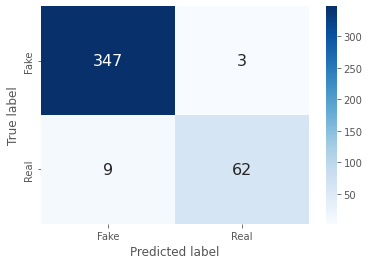

In [ ]:
conf_mat=confusion_matrix(y_true, y_pred)
make_confusion_matrix(conf_mat, figsize=(6,4),percent=False,sum_stats=False,categories=['Fake', 'Real'],cbar=True,cmap='Blues')